In [24]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [48]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)




Use `least_squares` to compute w, and visualize the results.

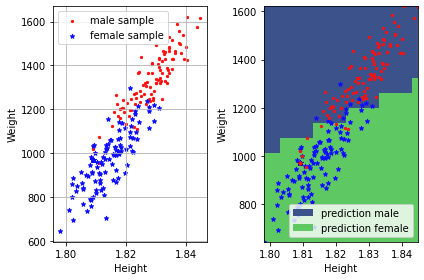

In [37]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    """Least square demo 

    Args:
        y:  shape=(N, 1)
        x:  shape=(N, 2)
    """
    # classify the data by linear regression
    tx = np.c_[np.ones((y.shape[0], 1)), x].T
    
    mse, w = least_squares(y, tx)
    mean_x = np.mean(x, axis=0)
    std_x = np.std(x, axis=0)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    # w = least squares with respect to tx and y

    # visualize your classification.
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, X)

## Logistic Regression

Compute your cost by negative log likelihood.

In [39]:
def sigmoid(t):
    return 1.0 / (1 + np.exp(-t))

test(sigmoid)

x = np.array([[1], [2], [3]])
z= np.squeeze(x)
print(z)
x.shape

[1 2 3]


(3, 1)

In [40]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 

    Returns:
        a non-negative loss
    """
    return np.mean(np.log(1 + np.exp(tx.dot(w))) - y * tx.dot(w))

test(calculate_loss)

Could not find any tests for calculate_loss


In [41]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss.
    
    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)<-- Wrong! Theoretically, it should be (D, N)
        w:  shape=(D, 1) 

    Returns:
        a vector of shape (D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_gradient(y, tx, w)
    array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return 1/len(y) *  tx.T.dot(sigmoid(tx.dot(w)) - y)

test(calculate_gradient)

✅ Your `calculate_gradient` passed 5 tests.


### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [44]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression. Return the loss and the updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 
        gamma: float

    Returns:
        loss: scalar number
        w: shape=(D, 1) 

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_gradient_descent(y, tx, w, gamma)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[0.11037076],
           [0.17932896],
           [0.24828716]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return calculate_loss(y, tx, w), w - gamma * calculate_gradient(y, tx, w)

test(learning_by_gradient_descent)

✅ Your `learning_by_gradient_descent` passed 7 tests.


Demo!

Current iteration=0, loss=0.6931471805599452
Current iteration=100, loss=206.57938496194066
Current iteration=200, loss=469.5142108884039
Current iteration=300, loss=268.83063903576374
Current iteration=400, loss=447.00230073917606
Current iteration=500, loss=215.23471192799488
Current iteration=600, loss=285.67921678071406
Current iteration=700, loss=382.1993513086059
Current iteration=800, loss=524.4159912333716
Current iteration=900, loss=inf
Current iteration=1000, loss=241.1043135944831
Current iteration=1100, loss=11.372355582998544
Current iteration=1200, loss=227.71537263376004
Current iteration=1300, loss=inf
Current iteration=1400, loss=221.58961279888982
Current iteration=1500, loss=inf
Current iteration=1600, loss=262.26641416690404
Current iteration=1700, loss=281.20791427769586
Current iteration=1800, loss=415.02110659774405
Current iteration=1900, loss=576.9125388276268
Current iteration=2000, loss=inf
Current iteration=2100, loss=234.74025136003314
Current iteration=220

C:\Users\moham\AppData\Local\Temp/ipykernel_23024/2936872685.py:12: RuntimeWarning: overflow encountered in exp
  return np.mean(np.log(1 + np.exp(tx.dot(w))) - y * tx.dot(w))
C:\Users\moham\AppData\Local\Temp/ipykernel_23024/1662781755.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))


Current iteration=2900, loss=57.78627916872197
Current iteration=3000, loss=89.44956258775386
Current iteration=3100, loss=238.20413487891798
Current iteration=3200, loss=393.52170789154667
Current iteration=3300, loss=563.2775852638896
Current iteration=3400, loss=5.467276444246051
Current iteration=3500, loss=25.761001943933408
Current iteration=3600, loss=240.29516456746697
Current iteration=3700, loss=17.37575245660397
Current iteration=3800, loss=17.81590506550862
Current iteration=3900, loss=18.23560862501863
Current iteration=4000, loss=18.655769040473523
Current iteration=4100, loss=19.07639593620766
Current iteration=4200, loss=19.497491941719364
Current iteration=4300, loss=19.9190563970941
Current iteration=4400, loss=20.34108543363797
Current iteration=4500, loss=20.76357211020499
Current iteration=4600, loss=21.186506604882826
Current iteration=4700, loss=21.609876458593693
Current iteration=4800, loss=22.03366686420057
Current iteration=4900, loss=22.457860992124175
Curre

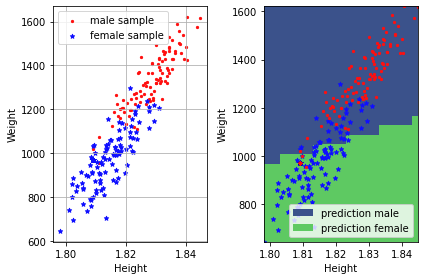

In [49]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.5
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, X)

Calculate your hessian below

In [50]:
def calculate_hessian(y, tx, w):
    return 1/len(y) * tx.T.dot(np.diagflat(sigmoid(tx.dot(w)) * (1 - sigmoid(tx.dot(w)))).dot(tx))
    """return the Hessian of the loss function.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 

    Returns:
        a hessian matrix of shape=(D, D) 

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_hessian(y, tx, w)
    array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate Hessian: TODO
    # ***************************************************
    raise NotImplementedError

test(calculate_hessian)

Write a function below to return loss, gradient, and hessian.

In [51]:
def logistic_regression(y, tx, w):
    return calculate_loss(y, tx, w), calculate_gradient(y, tx, w), calculate_hessian(y, tx, w)
    """return the loss, gradient of the loss, and hessian of the loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) s

    Returns:
        loss: scalar number
        gradient: shape=(D, 1) 
        hessian: shape=(D, D)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> loss, gradient, hessian = logistic_regression(y, tx, w)
    >>> round(loss, 8)
    0.62137268
    >>> gradient, hessian
    (array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]]), array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]]))
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    raise NotImplementedError

test(logistic_regression)

### Using Newton's method
Use Newton's method for logistic regression.

In [52]:
def learning_by_newton_method(y, tx, w, gamma):
    loss, gradient, hessian = logistic_regression(y, tx, w)
    w -= gamma * np.linalg.solve(hessian, gradient)
    return loss, w
    """
    Do one step of Newton's method.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> y = np.c_[[0., 0., 1., 1.]]
    >>> np.random.seed(0)
    >>> tx = np.random.rand(4, 3)
    >>> w = np.array([[0.1], [0.5], [0.5]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_newton_method(y, tx, w, gamma)
    >>> round(loss, 8)
    0.71692036
    >>> w
    array([[-1.31876014],
           [ 1.0590277 ],
           [ 0.80091466]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and Hessian: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

test(learning_by_newton_method)

demo

Current iteration=0, the loss=0.6931471805599452
Current iteration=1, the loss=0.3170577686954792
Current iteration=2, the loss=0.2365229309967529
Current iteration=3, the loss=0.20998733711242232
Current iteration=4, the loss=0.2047819931861897
Current iteration=5, the loss=0.20447559968244788
Current iteration=6, the loss=0.2044741280881354
Current iteration=7, the loss=0.20447412804945295
loss=0.20447412804945286


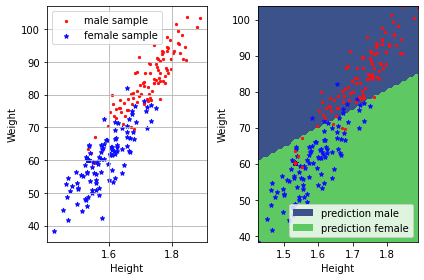

In [53]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))

        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [54]:
def penalized_logistic_regression(y, tx, w, lambda_):
    loss = calculate_loss(y, tx, w) + lambda_ * np.linalg.norm(w) ** 2
    gradient = calculate_gradient(y, tx, w) + 2 * lambda_ * w
    return loss, gradient

test(penalized_logistic_regression)

In [59]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    w -= gamma * gradient
    return loss, w

test(learning_by_penalized_gradient)

Current iteration=0, loss=0.6931471805599452
Current iteration=100, loss=0.2619362423765959
Current iteration=200, loss=0.24339056454546942
Current iteration=300, loss=0.23479665000535527
Current iteration=400, loss=0.23046376883793473
Current iteration=500, loss=0.22815007131276213
Current iteration=600, loss=0.226864059039025
Current iteration=700, loss=0.22612859539730765
Current iteration=800, loss=0.225699195027434
Current iteration=900, loss=0.2254446276917862
Current iteration=1000, loss=0.22529196995566594
Current iteration=1100, loss=0.22519962644478156
Current iteration=1200, loss=0.22514339519906107
Current iteration=1300, loss=0.22510897849624528
Current iteration=1400, loss=0.22508783000329993
Current iteration=1500, loss=0.22507479456852159
Current iteration=1600, loss=0.22506674053328968
Current iteration=1700, loss=0.22506175494701797
Current iteration=1800, loss=0.22505866424385018
Current iteration=1900, loss=0.22505674601979858
loss=0.2091854376403564


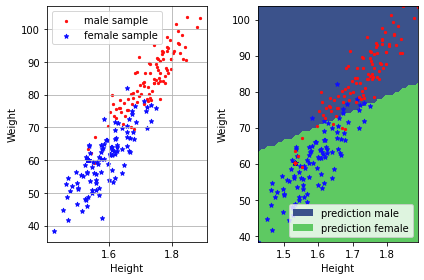

In [60]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.5
    lambda_ = 0.0005
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)